In [1]:
import torch
from PseudoBoosting import FakeEnsemble, FakeWeakLearner, FakeSchapireMulticlassBoosting, plot_fake_accuracies
import numpy as np
from torchvision import datasets, transforms

## Training an ensemble of fake weak learners

In [2]:
# # Original link: https://colab.research.google.com/drive/10QVptDOsqZnh03WzwCL6LFuj_qjed9FA#scrollTo=ZdLhuBKM2MVj

# train_y = np.array([])
# train_loader_default = torch.utils.data.DataLoader(
#     datasets.CIFAR10('./data', train=True, download=True, transform=transforms.Compose([
#             transforms.ToTensor(),
#             ])),
#         batch_size=100, shuffle=False)
# for data in train_loader_default:
#   train_y = np.concatenate((train_y, data[1]), axis = None)
# ensemble = FakeEnsemble(wl, wlweights)
# predictions, last_prediction = ensemble.schapirePredict(np.zeros((60000)), 10)
# print((last_prediction == train_y).astype(int).sum()/len(last_prediction))

In [3]:
wl, weights = FakeSchapireMulticlassBoosting(FakeWeakLearner, 10, datasets.CIFAR10, advDelta=0, alphaTol=1e-10, adv=False, maxIt=5)
# maxIt, adv, alphaTol and advDelta are meaningless here fyi

Files already downloaded and verified
Files already downloaded and verified
Training 0th weak learning
current accuracy: 0.180653305980748
Training 1th weak learning
current accuracy: 0.1820710582880263
Training 2th weak learning
current accuracy: 0.18204575701882247
Training 3th weak learning
current accuracy: 0.18192443770533231
Training 4th weak learning
current accuracy: 0.1807118761625524
Training 5th weak learning
current accuracy: 0.18112406539095172
Training 6th weak learning
current accuracy: 0.18150042896634996
Training 7th weak learning
current accuracy: 0.1808227848101266
Training 8th weak learning
current accuracy: 0.1815468630937262
Training 9th weak learning
current accuracy: 0.18078325669890596


In [4]:
train_y = np.array([])
train_loader_default = torch.utils.data.DataLoader(
    datasets.CIFAR10('./data', train=True, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=100, shuffle=False)
for data in train_loader_default:
  train_y = np.concatenate((train_y, data[1]), axis = None)

Files already downloaded and verified


numWeakLearners: 10
cur_prediction: [4. 8. 7. ... 1. 5. 1.]
numWeakLearners: 10
cur_prediction: [4. 8. 7. ... 1. 5. 1.]
numWeakLearners: 10
cur_prediction: [4. 8. 7. ... 1. 5. 1.]
numWeakLearners: 10
cur_prediction: [4. 8. 7. ... 1. 5. 1.]
numWeakLearners: 10
cur_prediction: [4. 8. 7. ... 1. 5. 1.]
numWeakLearners: 10
cur_prediction: [4. 2. 7. ... 1. 5. 1.]
numWeakLearners: 10
cur_prediction: [4. 2. 7. ... 9. 5. 6.]
numWeakLearners: 10
cur_prediction: [4. 2. 7. ... 6. 5. 6.]
numWeakLearners: 10
cur_prediction: [4. 2. 7. ... 6. 5. 5.]
numWeakLearners: 10
cur_prediction: [4. 2. 7. ... 9. 5. 1.]


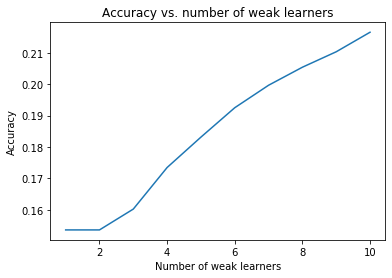

In [5]:
predictions, last_prediction = plot_fake_accuracies(wl, weights, train_y)